In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

# Connect google drive to get all data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
fpath = "/content/gdrive/MyDrive/images/Images" # Path for data

random_seed = 30
categories = os.listdir(fpath) # Catgories of dogs
categories = categories[:20] # Take only 20 first categories
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories)) # Print catogories 

List of categories =  ['n02116738-African_hunting_dog', 'n02113023-Pembroke', 'n02113186-Cardigan', 'n02113978-Mexican_hairless', 'n02112706-Brabancon_griffon', 'n02113712-miniature_poodle', 'n02115641-dingo', 'n02113799-standard_poodle', 'n02113624-toy_poodle', 'n02115913-dhole', 'n02111889-Samoyed', 'n02110806-basenji', 'n02110958-pug', 'n02111500-Great_Pyrenees', 'n02112137-chow', 'n02112018-Pomeranian', 'n02111129-Leonberg', 'n02110627-affenpinscher', 'n02112350-keeshond', 'n02111277-Newfoundland'] 

No. of categories =  20


In [ ]:
# Function to load images and labels from folders
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories) # Get all images and labels resized versions
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels)) # Print number of images 
print(type(images),type(labels))

No. of images loaded =  1870 
No. of labels loaded =  1870
<class 'list'> <class 'list'>


In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape) # Image shapes 
print(type(images),type(labels))

Images shape =  (1870, 227, 227, 3) 
Labels shape =  (1870,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


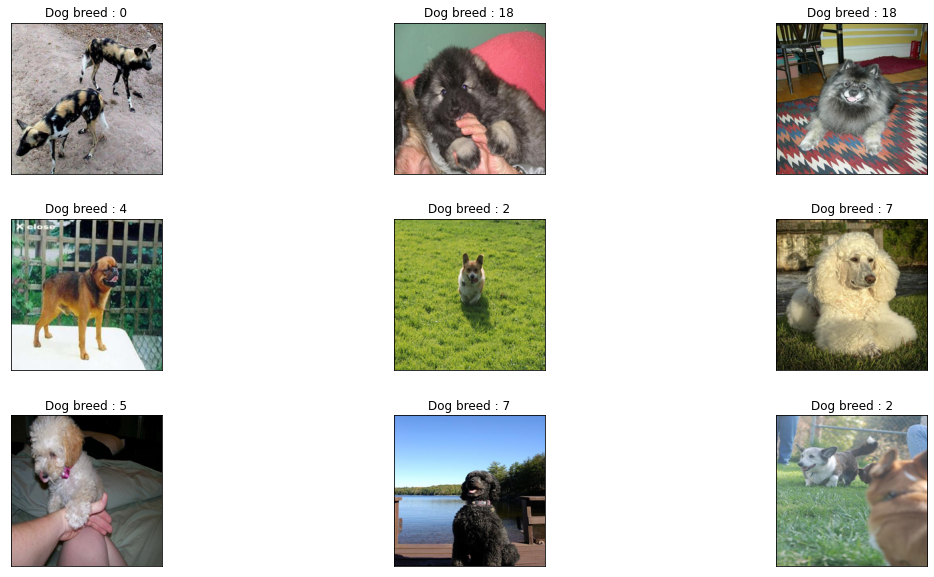

In [ ]:
# Function to plot images 
def display_rand_images(images, labels):
    # Set fisize
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    # Print random 9 images from the list
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
# Use function
display_rand_images(images, labels)

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1867 1868 1869]

'n' values after shuffling =  [1341 1442  662 ...  941  421 1829]


In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1870, 227, 227, 3) 
Labels shape after shuffling =  (1870,)


In [ ]:
images = images.astype(np.float32) # Convert image to float32 of numpy
labels = labels.astype(np.int32) # Convert image to int of numpy
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1870, 227, 227, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed) # Split data to train and test sets
# Print all shapes
print("x_train shape = ",x_train.shape) 
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1496, 227, 227, 3)
y_train shape =  (1496,)

x_test shape =  (374, 227, 227, 3)
y_test shape =  (374,)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (227,227,3)) , # Conv layers
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(), 
    keras.layers.Dense(550,activation="relu"),      # Hidden layer
    keras.layers.Dropout(0.1,seed = 2019),
    keras.layers.Dense(400,activation ="relu"),
    keras.layers.Dropout(0.3,seed = 2019),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dropout(0.4,seed = 2019),
    keras.layers.Dense(200,activation ="relu"),
    keras.layers.Dropout(0.2,seed = 2019),
    keras.layers.Dense(20,activation = "softmax")   # Output Layer
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Compile model

In [ ]:
model.fit(x_train, y_train, epochs=50) # Train our model

Epoch 1/50
47/47 [==============================] - 125s 3s/step - loss: 2.7105 - accuracy: 0.0916
Epoch 2/50
47/47 [==============================] - 113s 2s/step - loss: 2.5579 - accuracy: 0.0856
Epoch 3/50
47/47 [==============================] - 122s 3s/step - loss: 2.5290 - accuracy: 0.0849
Epoch 4/50
47/47 [==============================] - 116s 2s/step - loss: 2.4868 - accuracy: 0.1243
Epoch 5/50
47/47 [==============================] - 115s 2s/step - loss: 2.4078 - accuracy: 0.1330
Epoch 6/50
47/47 [==============================] - 103s 2s/step - loss: 2.3317 - accuracy: 0.1691
Epoch 7/50
47/47 [==============================] - 98s 2s/step - loss: 2.2897 - accuracy: 0.1945
Epoch 8/50
47/47 [==============================] - 102s 2s/step - loss: 2.1875 - accuracy: 0.1932
Epoch 9/50
47/47 [==============================] - 100s 2s/step - loss: 2.0458 - accuracy: 0.2781
Epoch 10/50
47/47 [==============================] - 99s 2s/step - loss: 1.9109 - accuracy: 0.3189
Epoch 11/50

# Новый раздел

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test) 

print(loss,accuracy)

12/12 [==============================] - 7s 547ms/step - loss: 2.8081 - accuracy: 0.0642
2.808149814605713 0.06417112052440643


In [ ]:
pred = model.predict(x_test) 

pred.shape

12/12 [==============================] - 9s 706ms/step


(374, 20)

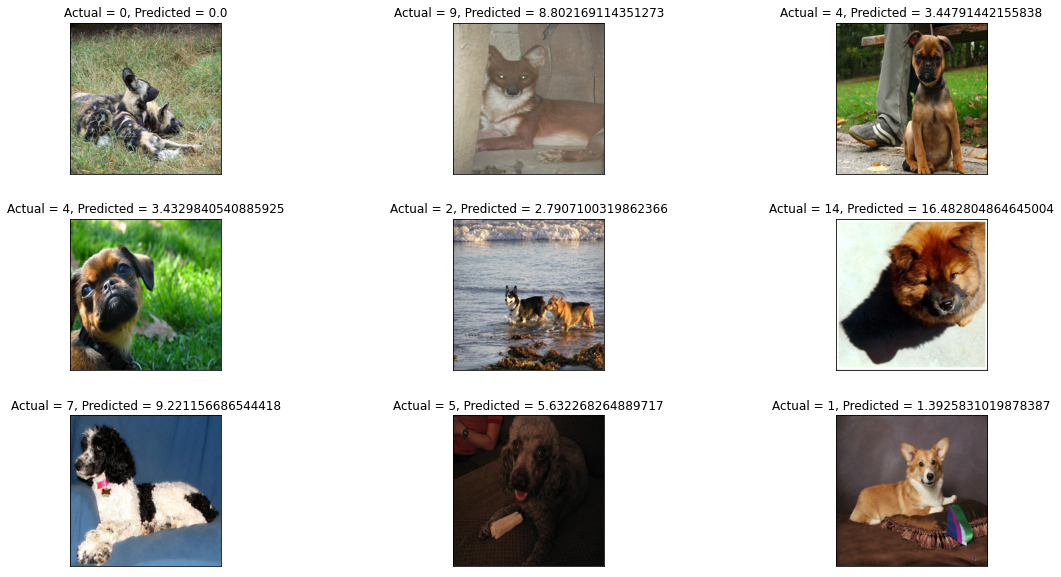

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]*20) )
    plt.xticks([]) , plt.yticks([])

plt.show()